In [5]:
import matplotlib as plt
import numpy as np
import lightkurve as lk
from lightkurve import search_targetpixelfile
%matplotlib inline

In [8]:
search_targetpixelfile("EPIC 212593538", author='K2', campaign=6)

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,K2 Campaign 06,2015,K2,1800,ktwo212593538,0.0


In [15]:
tpf = search_targetpixelfile("EPIC 212593538", author='K2', campaign=6).download()
tpf.shape

(3545, 8, 8)

In [17]:
tpf.interact()

In [18]:
postage_stamp_mask = tpf.hdu[2].data > 0
postage_stamp_mask.sum()

63

In [21]:
lc_raw = tpf.to_lightcurve(aperture_mask='all')
_, spurious_cadences = lc_raw.flatten().remove_outliers(return_mask=True)
lc_clean = lc_raw[~spurious_cadences]

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

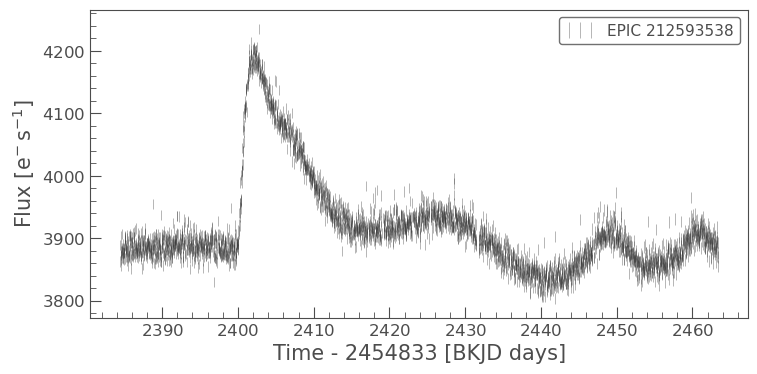

In [24]:
lc_clean.errorbar(alpha=0.5, normalize=False)